In [1]:
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
b_size = 5

train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True, # 수평대칭 이미지를 50% 확률로 만들어 추가
                                   width_shift_range=0.1, # 전체 크기의 10% 범위에서 좌우로 이동.
                                   height_shift_range=0.1, # 마찬가지로 위 , 아래로 이동
                                   # rotation_range=5,
                                   # shear_range=0.7,
                                   # zoom_range=[0.9, 2.2],
                                   # vertical_flip=True
                                   fill_mode='nearest')


In [3]:
train_generator = train_datagen.flow_from_directory('/Users/user/java-web-project0208/python-basic/dataset/MRI/train',
                                                    target_size=(150, 150),
                                                    batch_size=b_size,
                                                    class_mode='binary')

Found 160 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
test_generator = test_datagen.flow_from_directory('/Users/user/java-web-project0208/python-basic/dataset/MRI/test',
                                                  target_size=(150, 150),
                                                  batch_size=b_size,
                                                  class_mode='binary')

Found 120 images belonging to 2 classes.


In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002),
              metrics=['accuracy'])

In [10]:
steps_train = len(train_generator)
steps_test = len(test_generator)

history = model.fit(
    train_generator,
    steps_per_epoch = steps_train,
    epochs=20,
    validation_data=test_generator,
    validation_steps=steps_test
    )

Train for 32 steps, validate for 24 steps
Epoch 1/20
32/32 [==============================] - 11s 354ms/step - loss: 0.7043 - accuracy: 0.4500 - val_loss: 0.6885 - val_accuracy: 0.5083
Epoch 2/20
32/32 [==============================] - 7s 204ms/step - loss: 0.6841 - accuracy: 0.5562 - val_loss: 0.6822 - val_accuracy: 0.7500
Epoch 3/20
32/32 [==============================] - 7s 206ms/step - loss: 0.6871 - accuracy: 0.5750 - val_loss: 0.6662 - val_accuracy: 0.5917
Epoch 4/20
32/32 [==============================] - 6s 199ms/step - loss: 0.6554 - accuracy: 0.6500 - val_loss: 0.6301 - val_accuracy: 0.7250
Epoch 5/20
32/32 [==============================] - 6s 190ms/step - loss: 0.6843 - accuracy: 0.5750 - val_loss: 0.6519 - val_accuracy: 0.5167
Epoch 6/20
32/32 [==============================] - 6s 195ms/step - loss: 0.6410 - accuracy: 0.6500 - val_loss: 0.6188 - val_accuracy: 0.5583
Epoch 7/20
32/32 [==============================] - 6s 191ms/step - loss: 0.5941 - accuracy: 0.6938 - val

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

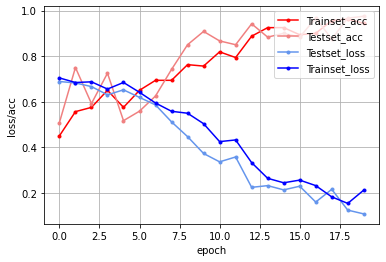

In [13]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker =".", c ="red", label="Trainset_acc")
plt.plot(x_len, val_acc, marker =".", c ="lightcoral", label="Testset_acc")
plt.plot(x_len, y_vloss, marker =".", c ="cornflowerblue", label="Testset_loss")
plt.plot(x_len, y_loss, marker =".", c ="blue", label="Trainset_loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()